In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pragyanaiprojectthon-payment-fraud-data/payment_fraud.csv


In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
data = pd.read_csv('/kaggle/input/pragyanaiprojectthon-payment-fraud-data/payment_fraud.csv') 
print(data.head())

   accountAgeDays  numItems  localTime paymentMethod  paymentMethodAgeDays  \
0              29         1   4.745402        paypal             28.204861   
1             725         1   4.742303   storecredit              0.000000   
2             845         1   4.921318    creditcard              0.000000   
3             503         1   4.886641    creditcard              0.000000   
4            2000         1   5.040929    creditcard              0.000000   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  object 
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 1.8+ MB


In [11]:
data.describe()

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label
count,39221.000000,39221.000000,39221.000000,39221.000000,39221.000000
mean,857.563984,1.084751,4.748232,122.641326,0.014278
std,804.788212,0.566899,0.389360,283.569177,0.118636
min,1.000000,1.000000,0.421214,0.000000,0.000000
25%,72.000000,1.000000,4.742303,0.000000,0.000000
50%,603.000000,1.000000,4.886641,0.012500,0.000000
75%,1804.000000,1.000000,4.962055,87.510417,0.000000
max,2000.000000,29.000000,5.040929,1999.580556,1.000000


In [12]:
data.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'label'],
      dtype='object')

In [13]:
data.paymentMethod.unique()

array(['paypal', 'storecredit', 'creditcard'], dtype=object)

In [14]:
data.paymentMethod.value_counts()

paymentMethod
creditcard     28004
paypal          9303
storecredit     1914
Name: count, dtype: int64

# Converting categorical to numerical manual

In [15]:
data.paymentMethod.replace('paypal',0,inplace=True) # Online 
data.paymentMethod.replace('storecredit',1,inplace=True) # Card Based 
data.paymentMethod.replace('creditcard',1,inplace=True) # Card Based

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39221 entries, 0 to 39220
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accountAgeDays        39221 non-null  int64  
 1   numItems              39221 non-null  int64  
 2   localTime             39221 non-null  float64
 3   paymentMethod         39221 non-null  int64  
 4   paymentMethodAgeDays  39221 non-null  float64
 5   label                 39221 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.8 MB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

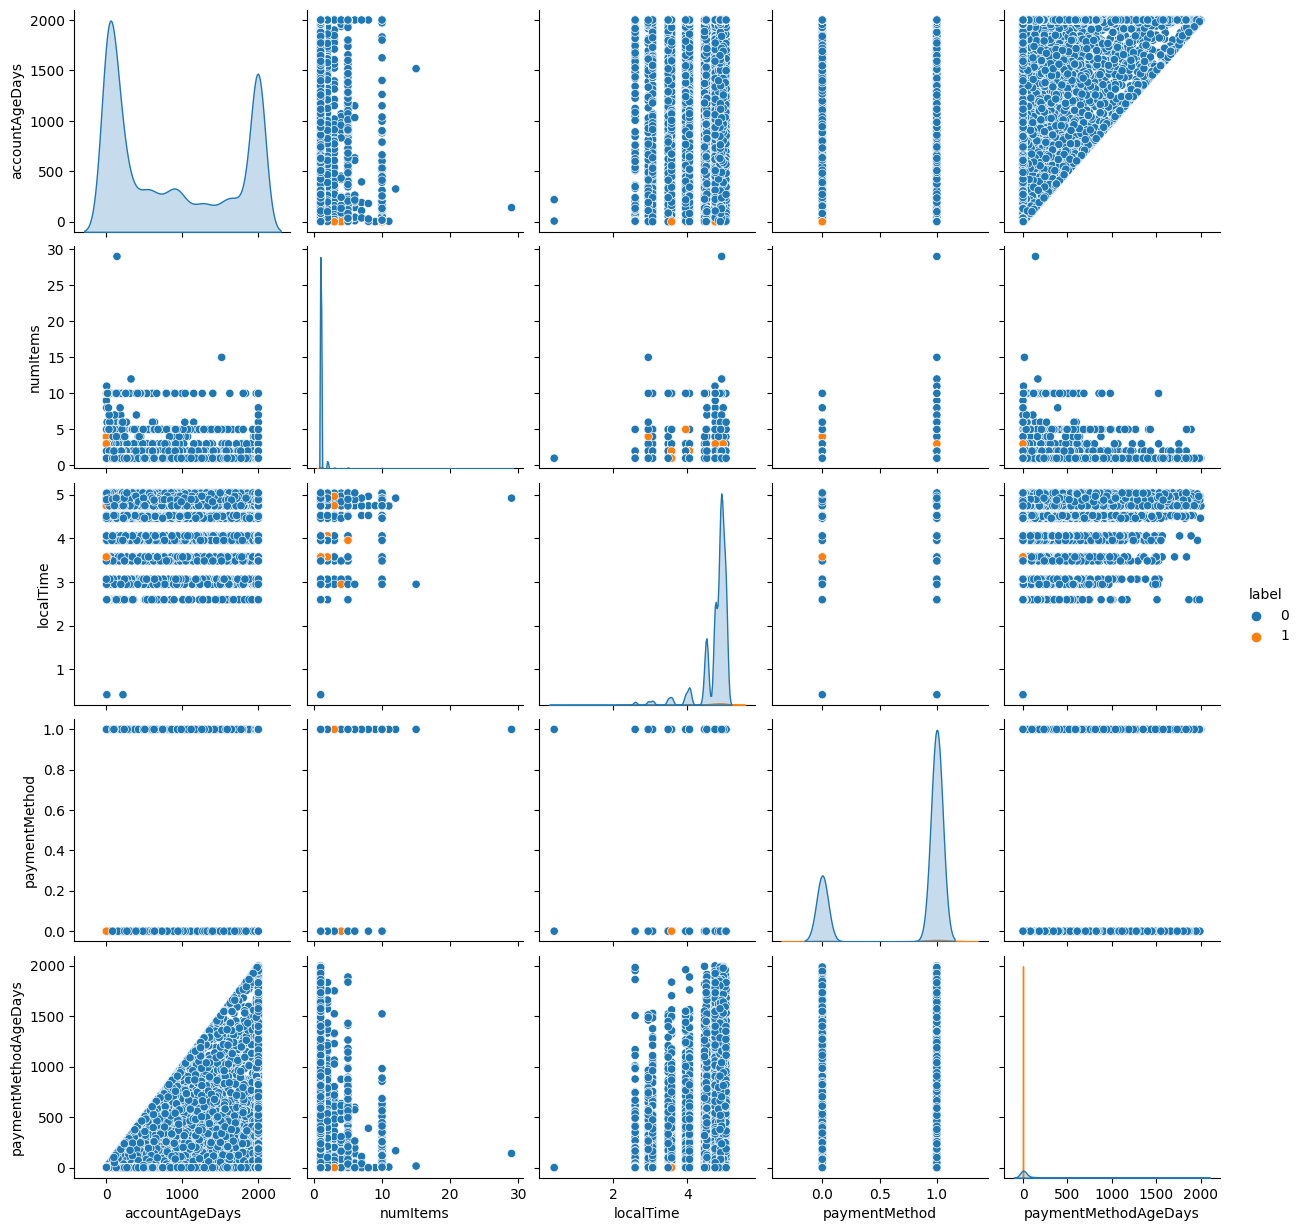

In [17]:
sns.pairplot(data, hue='label') 
plt.show()

<Figure size 800x600 with 0 Axes>

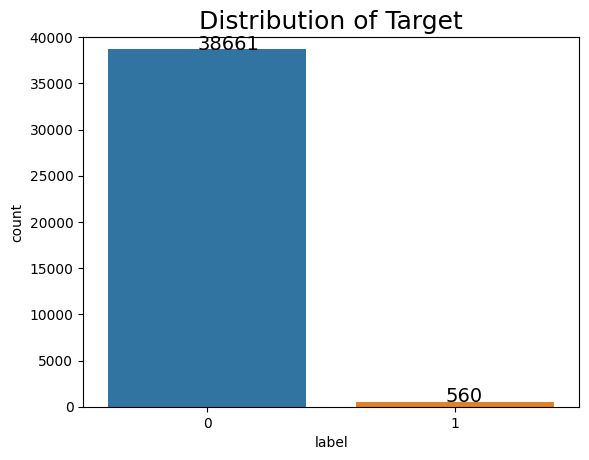

In [18]:
plt.figure(figsize=(8,6)) 
fig, ax = plt.subplots() 
plt.title('Distribution of Target', size=18) 
sns.countplot(x=data['label']) 
target_count = data.label.value_counts() 
ax.annotate(target_count[0], xy=(-0.04,10+target_count[0]), size=14) 
ax.annotate(target_count[1], xy=(0.96,10+target_count[1]), size=14) 
plt.ylim(0,40000) 
plt.show()

In [19]:
# import library 
import imblearn 
from imblearn.over_sampling import RandomOverSampler 
x = data.drop('label', axis =1) 
y=data['label'] 
target_count = data.label.value_counts() 
ros = RandomOverSampler(random_state=42) 
x_rus, y_rus = ros.fit_resample(x, y) 
modified_count = y_rus.value_counts() 
print('original dataset shape:',target_count[0],target_count[1] ) 
print('Resample dataset shape', modified_count[0],modified_count[1])

original dataset shape: 38661 560
Resample dataset shape 38661 38661


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus , test_size=0.3, random_state=42)


In [21]:
scalar = StandardScaler() 
scalar.fit(x_train) 
x_train = scalar.transform(x_train) 
x_test = scalar.transform(x_test)

In [22]:
clf = LogisticRegression() 
clf.fit(x_train, y_train)

LogisticRegression()

In [23]:
import scikitplot as skplt 
print("Scikit Plot Version : ", skplt.__version__)

Scikit Plot Version :  0.3.7


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


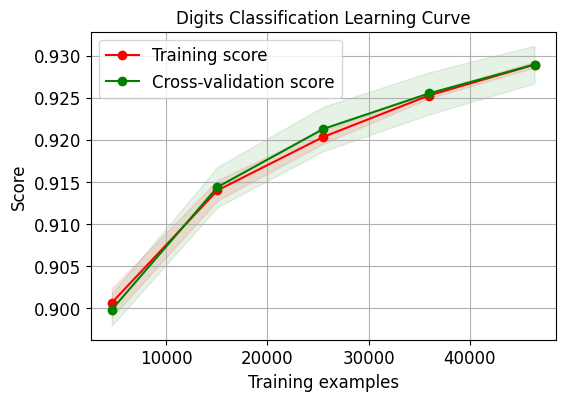

In [24]:
skplt.estimators.plot_learning_curve(clf, x_train, y_train,
                                     cv=7, shuffle=True, scoring="accuracy", n_jobs=-1, 
                                     figsize=(6,4), title_fontsize="large", 
                                     text_fontsize="large", title="Digits Classification Learning Curve");

In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
rf_reg = RandomForestClassifier() 
rf_reg.fit(x_train, y_train) 
rf_reg.score(x_test, y_test)

1.0

In [26]:
gb_classif = GradientBoostingClassifier() 
gb_classif.fit(x_train, y_train) 
gb_classif.score(x_test, y_test)

1.0

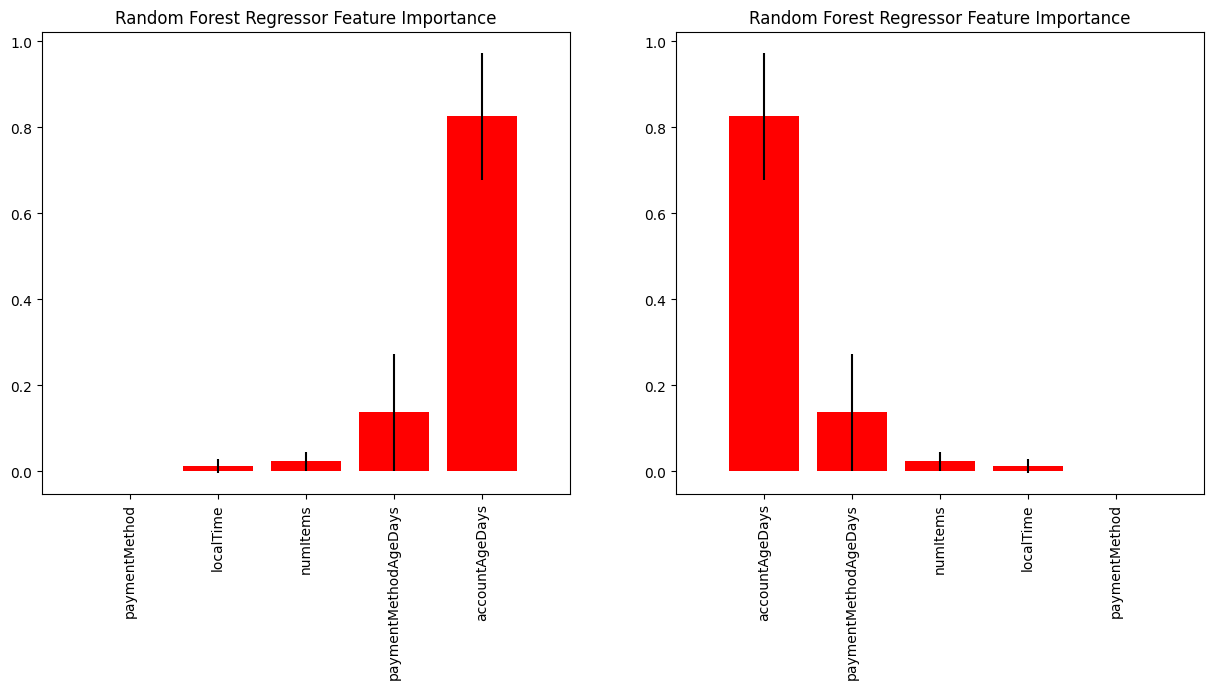

In [27]:
fig = plt.figure(figsize=(15,6)) 
ax1 = fig.add_subplot(121) 
features = ['accountAgeDays', 'numItems', 'localTime', 'paymentMethod','paymentMethodAgeDays',] 
skplt.estimators.plot_feature_importances(rf_reg, feature_names=features, 
                                          title="Random Forest Regressor Feature Importance", 
                                          x_tick_rotation=90, order="ascending", ax=ax1); 
ax2 = fig.add_subplot(122) 
skplt.estimators.plot_feature_importances(rf_reg, feature_names=features, 
                                          title="Random Forest Regressor Feature Importance", 
                                          x_tick_rotation=90, order="descending", ax=ax2); 



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

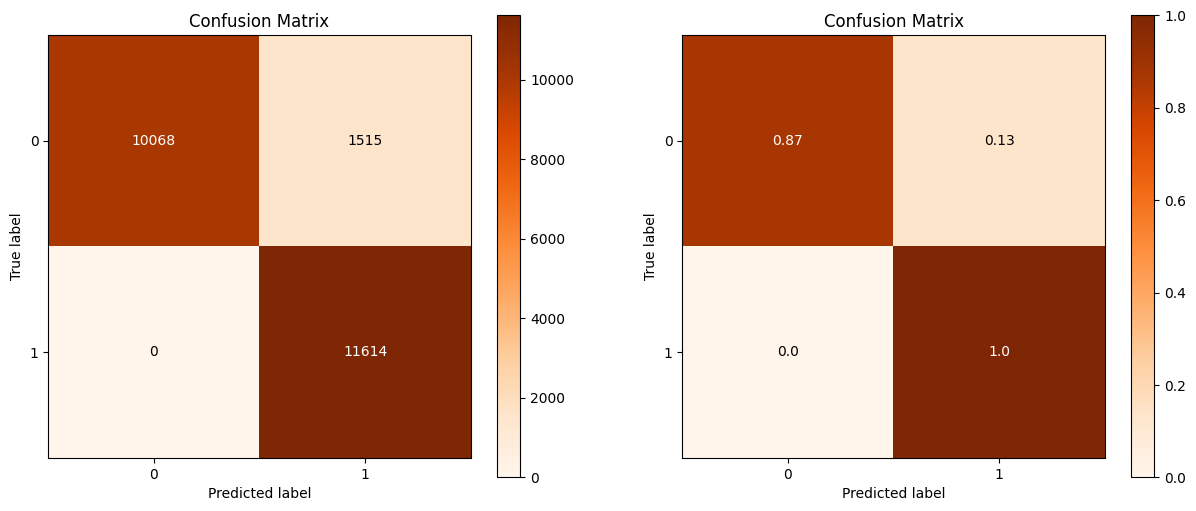

In [28]:
Y_pred = clf.predict(x_test) 
fig = plt.figure(figsize=(15,6)) 
ax1 = fig.add_subplot(121) 
skplt.metrics.plot_confusion_matrix(y_test, Y_pred, 
                                    title="Confusion Matrix", cmap="Oranges", 
                                    ax=ax1) 
ax2 = fig.add_subplot(122) 
skplt.metrics.plot_confusion_matrix(y_test, Y_pred, normalize=True, 
                                    title="Confusion Matrix",cmap="Oranges", 
                                    ax=ax2)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


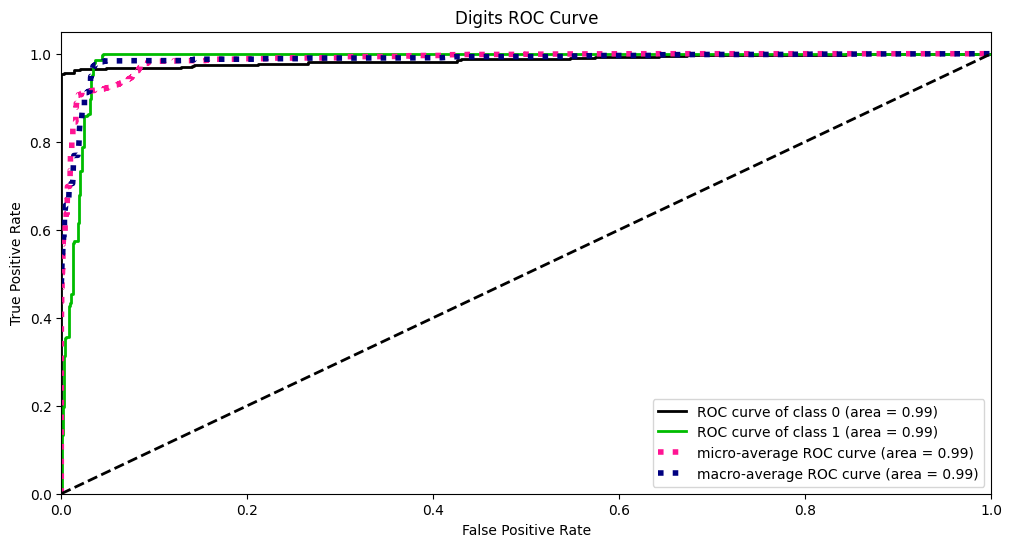

In [29]:
Y_test_probs = clf.predict_proba(x_test) 
skplt.metrics.plot_roc_curve(y_test, Y_test_probs, 
                             title="Digits ROC Curve", figsize=(12,6));

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


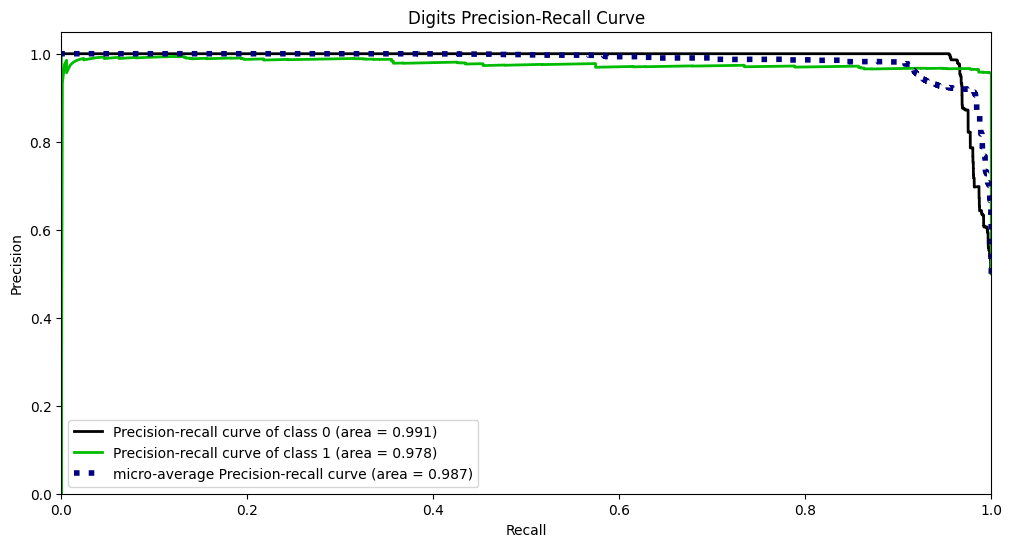

In [30]:
skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs, title="Digits Precision-Recall Curve", figsize=(12,6));

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


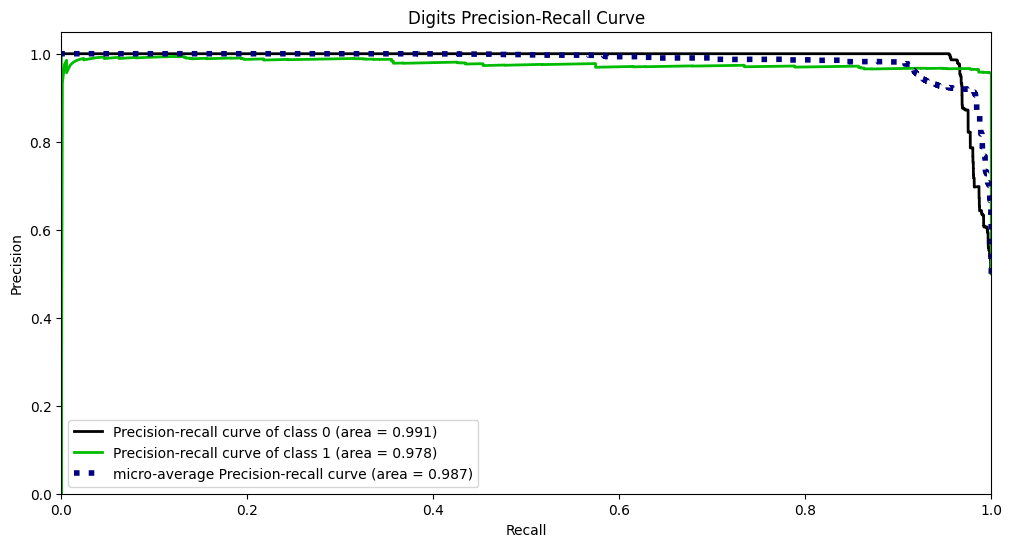

In [31]:
skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs, 
                                          title="Digits Precision-Recall Curve", figsize=(12,6));

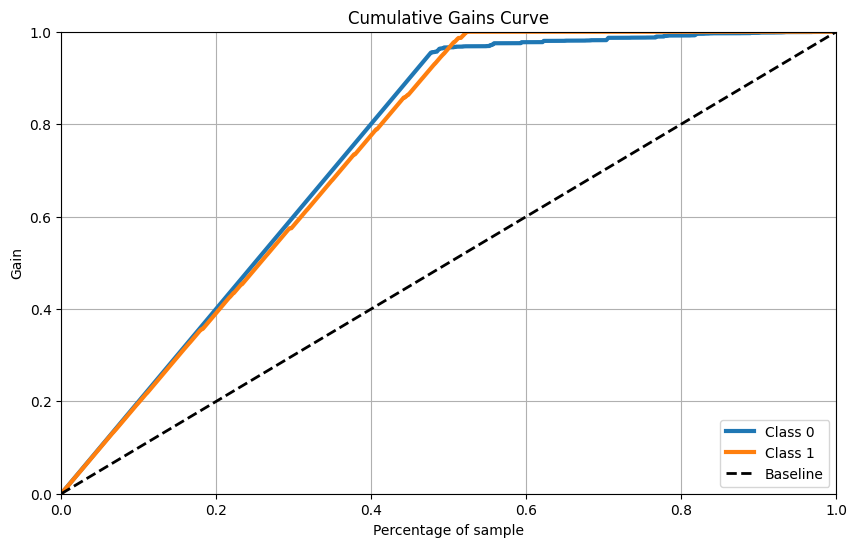

In [32]:
skplt.metrics.plot_cumulative_gain(y_test, Y_test_probs, figsize=(10,6));

In [33]:
method_names = []
method_scores = []

In [34]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb

# Define the estimators for the StackingClassifier
estimators = [
    ('lgb', lgb.LGBMClassifier()),
    ('catb', CatBoostClassifier(iterations=5, learning_rate=0.1, loss_function='CrossEntropy')),
    ('xgb', xgb.XGBClassifier(eta=0.01)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
]

# Define the StackingClassifier
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=AdaBoostClassifier(n_estimators=100, random_state=0)
)

# Fit the StackingClassifier
clf.fit(x_train, y_train)


0:	learn: 0.5983721	total: 58.2ms	remaining: 233ms
1:	learn: 0.5207566	total: 63.9ms	remaining: 95.8ms
2:	learn: 0.4561240	total: 68.9ms	remaining: 45.9ms
3:	learn: 0.4012365	total: 73.1ms	remaining: 18.3ms
4:	learn: 0.3543637	total: 77.3ms	remaining: 0us
0:	learn: 0.5984281	total: 5.2ms	remaining: 20.8ms
1:	learn: 0.5208615	total: 9.75ms	remaining: 14.6ms
2:	learn: 0.4562707	total: 14.1ms	remaining: 9.41ms
3:	learn: 0.4013783	total: 17.9ms	remaining: 4.47ms
4:	learn: 0.3545014	total: 21.3ms	remaining: 0us
0:	learn: 0.5984300	total: 4.17ms	remaining: 16.7ms
1:	learn: 0.5208632	total: 8.76ms	remaining: 13.1ms
2:	learn: 0.4562746	total: 13.2ms	remaining: 8.79ms
3:	learn: 0.4014210	total: 16.8ms	remaining: 4.2ms
4:	learn: 0.3545377	total: 20.2ms	remaining: 0us
0:	learn: 0.5984359	total: 4.76ms	remaining: 19.1ms
1:	learn: 0.5208594	total: 9.35ms	remaining: 14ms
2:	learn: 0.4562768	total: 13.8ms	remaining: 9.17ms
3:	learn: 0.4014211	total: 17.3ms	remaining: 4.32ms
4:	learn: 0.3545372	total:

StackingClassifier(estimators=[('lgb', LGBMClassifier()),
                               ('catb',
                                <catboost.core.CatBoostClassifier object at 0x7f59fd9366b0>),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eta=0.01, eval_metric=None,
                                              featur...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('rf', RandomForestClassifier(random_state=42))],
                   final_estimator=AdaBoostClassifier(n_estimators=100,
                                                      random_state=0))

Stacking Classification Score:  1.0


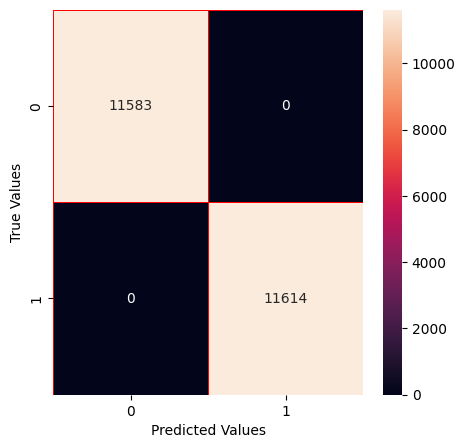

In [36]:
print("Stacking Classification Score: ",clf.score(x_test,y_test)) 
method_names.append("Stacking Classifier") 
method_scores.append(clf.score(x_test,y_test)) #Confusion Matrix 
y_pred = clf.predict(x_test) 
conf_mat = confusion_matrix(y_test,y_pred) #Visualization Confusion Matrix 
f, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax) 
plt.xlabel("Predicted Values") 
plt.ylabel("True Values") 
plt.show()


In [37]:
from sklearn.metrics import classification_report 
target_names = ['NotFraud', 'Fraud'] 
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    NotFraud       1.00      1.00      1.00     11583
       Fraud       1.00      1.00      1.00     11614

    accuracy                           1.00     23197
   macro avg       1.00      1.00      1.00     23197
weighted avg       1.00      1.00      1.00     23197



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


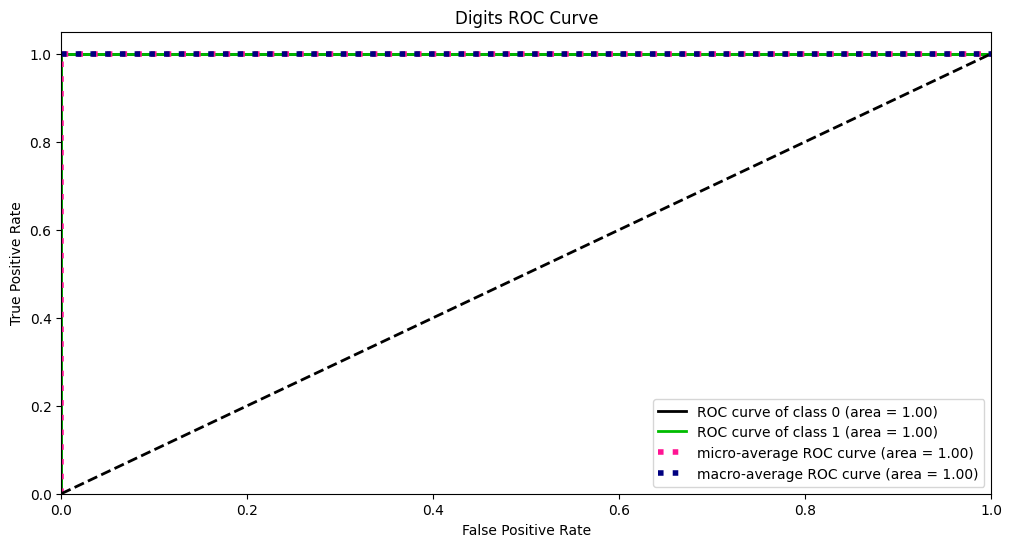

In [38]:
Y_test_probs = clf.predict_proba(x_test) 
skplt.metrics.plot_roc_curve(y_test, Y_test_probs, title="Digits ROC Curve", figsize=(12,6));

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


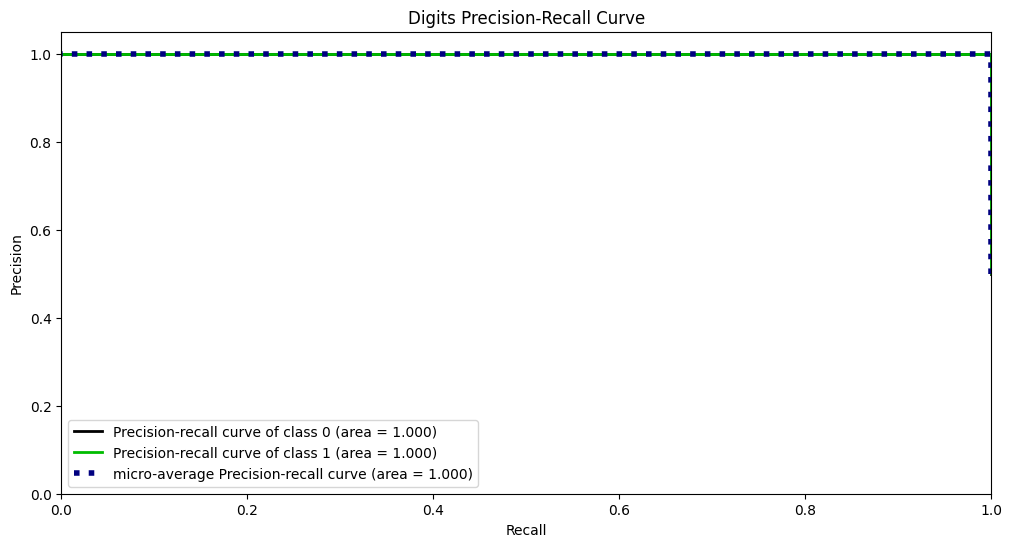

In [39]:
skplt.metrics.plot_precision_recall_curve(y_test, Y_test_probs, title="Digits Precision-Recall Curve", figsize=(12,6));

In [40]:
!pip install yellowbrick

In [41]:
data = pd.read_csv('/kaggle/input/pragyanaiprojectthon-payment-fraud-data/payment_fraud.csv') 


In [42]:
data.paymentMethod.replace('paypal',0,inplace=True) # Online 
data.paymentMethod.replace('storecredit',1,inplace=True) # Card Based 
data.paymentMethod.replace('creditcard',1,inplace=True) # Card Based

In [43]:
# import library 
import imblearn 
from imblearn.over_sampling import RandomOverSampler 
x = data.drop('label', axis =1) 
y=data['label'] 
target_count = data.label.value_counts() 
ros = RandomOverSampler(random_state=42) 
x_rus, y_rus = ros.fit_resample(x, y) 
modified_count = y_rus.value_counts() 
print('original dataset shape:',target_count[0],target_count[1] ) 
print('Resample dataset shape', modified_count[0],modified_count[1])

original dataset shape: 38661 560
Resample dataset shape 38661 38661


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus , test_size=0.3, random_state=42)

In [45]:
scalar = StandardScaler() 
scalar.fit(x_train) 
x_train = scalar.transform(x_train) 
x_test = scalar.transform(x_test)

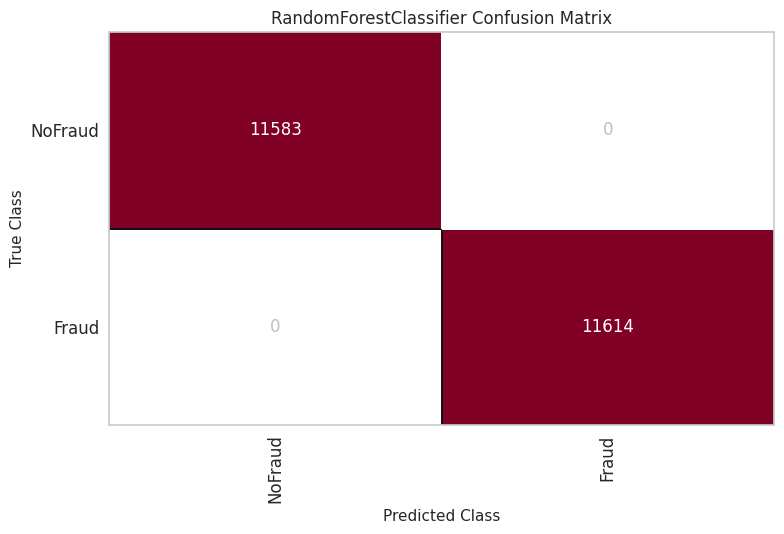

In [46]:
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.ensemble import RandomForestClassifier 
visualizer = ConfusionMatrix(RandomForestClassifier(random_state=1),
                             classes=['NoFraud','Fraud']) 
visualizer.fit(x_train,y_train) 
visualizer.score(x_test,y_test) 
visualizer.show();

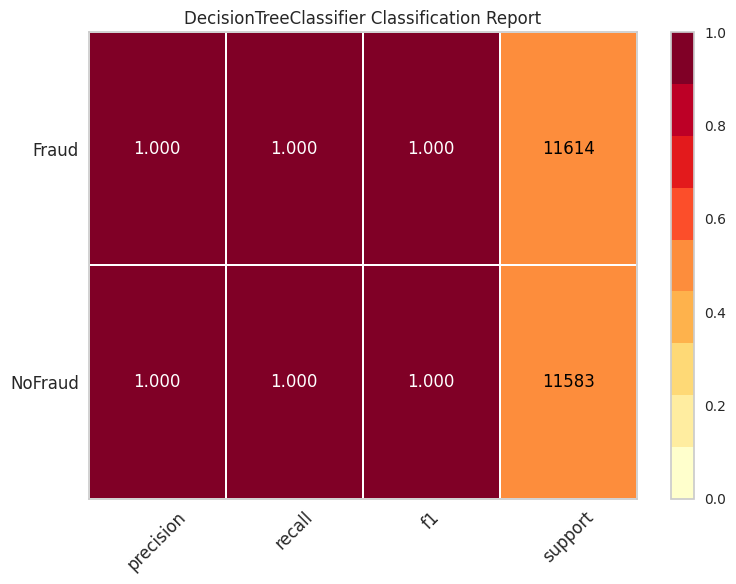

In [47]:
from yellowbrick.classifier import ClassificationReport 
from sklearn.tree import DecisionTreeClassifier 
viz = ClassificationReport(DecisionTreeClassifier(random_state=123), 
                           classes=['NoFraud','Fraud'], support=True, 
                           fig=plt.figure(figsize=(8,6))) 
viz.fit(x_train,y_train) 
viz.score(x_test,y_test) 
viz.show();